In [0]:
import pandas as pd
import ast
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt


#Shreemangal
from math import sqrt
from ipywidgets import widget
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from google.colab import drive

tf.disable_v2_behavior()

In [132]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data

In [133]:
movies = pd. read_csv('/content/drive/My Drive/SWM/the-movies-dataset/movies_metadata.csv')
extlinks = pd.read_csv('/content/drive/My Drive/SWM/the-movies-dataset/links_small.csv')
ratings = pd.read_csv('/content/drive/My Drive/SWM/the-movies-dataset/ratings_small.csv')
extlinks.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [134]:
credits = pd.read_csv('/content/drive/My Drive/SWM/the-movies-dataset/credits.csv')
keywords = pd.read_csv('/content/drive/My Drive/SWM/the-movies-dataset/keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [0]:
movies = movies.drop([19730, 29503, 35587])
extlinks = extlinks[extlinks['tmdbId'].notnull()]['tmdbId'].astype('int')

In [0]:
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda genres: [genre['name'] for genre in genres] if isinstance(genres, list) else [])

In [0]:
movies['id'] = movies['id'].astype('int')
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies = movies.merge(credits, on='id')
movies = movies.merge(keywords, on='id')

In [138]:
movies_filtered = movies[movies['id'].isin(extlinks)]
movies_filtered.head()
movies_filtered.shape

(9219, 27)

In [139]:
movies_filtered['cast'] = movies_filtered['cast'].apply(ast.literal_eval)
movies_filtered['crew'] = movies_filtered['crew'].apply(ast.literal_eval)
movies_filtered['keywords'] = movies_filtered['keywords'].apply(ast.literal_eval)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [140]:
movies_filtered['cast_size'] = movies_filtered['cast'].apply(lambda x: len(x))
movies_filtered['crew_size'] = movies_filtered['crew'].apply(lambda x: len(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
def getDirector(crew):
  for person in crew:
    if person['job'] == 'Director':
          return person['name']
  return np.nan
movies_filtered['director'] = movies_filtered['crew'].apply(getDirector)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
movies_filtered['cast']  = movies_filtered['cast'].apply(lambda cast: [person['name'] for person in cast] if isinstance(cast, list) else [])
movies_filtered['cast'] = movies_filtered['cast'].apply(lambda cast: cast[:3] if len(cast) >=3 else cast)
movies_filtered['cast']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                      [Tom Hanks, Tim Allen, Don Rickles]
1           [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2               [Walter Matthau, Jack Lemmon, Ann-Margret]
3        [Whitney Houston, Angela Bassett, Loretta Devine]
4               [Steve Martin, Diane Keaton, Martin Short]
                               ...                        
40952      [Sidney Poitier, Wendy Crewson, Jay O. Sanders]
41172            [Akshay Kumar, Ileana D'Cruz, Esha Gupta]
41225            [Hrithik Roshan, Pooja Hegde, Kabir Bedi]
41391    [Hiroki Hasegawa, Yutaka Takenouchi, Satomi Is...
41669           [Paul McCartney, Ringo Starr, John Lennon]
Name: cast, Length: 9219, dtype: object

In [143]:
movies_filtered['keywords'] = movies_filtered['keywords'].apply(lambda keywords: [keyword['name'] for keyword in keywords] if isinstance(keywords, list) else [])
movies_filtered['keywords']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        [jealousy, toy, boy, friendship, friends, riva...
1        [board game, disappearance, based on children'...
2        [fishing, best friend, duringcreditsstinger, o...
3        [based on novel, interracial relationship, sin...
4        [baby, midlife crisis, confidence, aging, daug...
                               ...                        
40952                           [friendship, brick making]
41172                                          [bollywood]
41225                                          [bollywood]
41391    [monster, godzilla, giant monster, destruction...
41669                                 [music, documentary]
Name: keywords, Length: 9219, dtype: object

In [144]:
movies_filtered['director'] = movies_filtered['director'].astype('str').apply(lambda name: str.lower(name.replace(" ", "")))
movies_filtered['director'] = movies_filtered['director'].apply(lambda name: [name, name, name])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [145]:
movies_filtered['director']

0               [johnlasseter, johnlasseter, johnlasseter]
1                  [joejohnston, joejohnston, joejohnston]
2               [howarddeutch, howarddeutch, howarddeutch]
3         [forestwhitaker, forestwhitaker, forestwhitaker]
4               [charlesshyer, charlesshyer, charlesshyer]
                               ...                        
40952        [greggchampion, greggchampion, greggchampion]
41172    [tinusureshdesai, tinusureshdesai, tinusureshd...
41225    [ashutoshgowariker, ashutoshgowariker, ashutos...
41391              [hideakianno, hideakianno, hideakianno]
41669                    [ronhoward, ronhoward, ronhoward]
Name: director, Length: 9219, dtype: object

In [146]:
keywords = movies_filtered.apply(lambda movie: pd.Series(movie['keywords']),axis=1).stack().reset_index(level=1, drop=True)
keywords = keywords.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [147]:
keywords = keywords[keywords>1]
keywords.head()

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
dtype: int64

In [0]:
def filterKeywords(list):
  words = []
  for word in list:
    if word in keywords:
      words.append(word)
  return words

In [149]:
movies_filtered['keywords'] = movies_filtered['keywords'].apply(filterKeywords)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
movies_filtered['keywords'] = movies_filtered['keywords'].apply(lambda movieKeywords: [SnowballStemmer('english').stem(word) for word in movieKeywords])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
movies_filtered['keywords'] = movies_filtered['keywords'].apply(lambda movieKeywords: [str.lower(word.replace(" ", "")) for word in movieKeywords])
movies_filtered['keywords']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        [jealousi, toy, boy, friendship, friend, rival...
1        [boardgam, disappear, basedonchildren'sbook, n...
2                   [fish, bestfriend, duringcreditssting]
3        [basedonnovel, interracialrelationship, single...
4        [babi, midlifecrisi, confid, age, daughter, mo...
                               ...                        
40952                                         [friendship]
41172                                          [bollywood]
41225                                          [bollywood]
41391     [monster, godzilla, giantmonst, destruct, kaiju]
41669                                 [music, documentari]
Name: keywords, Length: 9219, dtype: object

In [152]:
movies_filtered['document'] = movies_filtered['keywords'] + movies_filtered['cast'] + movies_filtered['director'] + movies_filtered['genres']
movies_filtered['document'] = movies_filtered['document'].apply(lambda x: ' '.join(x))
movies_filtered['document'] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        jealousi toy boy friendship friend rivalri boy...
1        boardgam disappear basedonchildren'sbook newho...
2        fish bestfriend duringcreditssting Walter Matt...
3        basedonnovel interracialrelationship singlemot...
4        babi midlifecrisi confid age daughter motherda...
                               ...                        
40952    friendship Sidney Poitier Wendy Crewson Jay O....
41172    bollywood Akshay Kumar Ileana D'Cruz Esha Gupt...
41225    bollywood Hrithik Roshan Pooja Hegde Kabir Bed...
41391    monster godzilla giantmonst destruct kaiju Hir...
41669    music documentari Paul McCartney Ringo Starr J...
Name: document, Length: 9219, dtype: object

In [153]:
movies_filtered['document'] 

0        jealousi toy boy friendship friend rivalri boy...
1        boardgam disappear basedonchildren'sbook newho...
2        fish bestfriend duringcreditssting Walter Matt...
3        basedonnovel interracialrelationship singlemot...
4        babi midlifecrisi confid age daughter motherda...
                               ...                        
40952    friendship Sidney Poitier Wendy Crewson Jay O....
41172    bollywood Akshay Kumar Ileana D'Cruz Esha Gupt...
41225    bollywood Hrithik Roshan Pooja Hegde Kabir Bed...
41391    monster godzilla giantmonst destruct kaiju Hir...
41669    music documentari Paul McCartney Ringo Starr J...
Name: document, Length: 9219, dtype: object

In [0]:
count_vector = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count_vector.fit_transform(movies_filtered['document'] )
similarity = cosine_similarity(count_matrix, count_matrix)

In [0]:
movies_filtered = movies_filtered.reset_index()
titles = movies_filtered['title']
indices = pd.Series(movies_filtered.index, index=movies_filtered['title'])

In [156]:
movies_filtered

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director,document
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...",13,106,"[johnlasseter, johnlasseter, johnlasseter]",jealousi toy boy friendship friend rivalri boy...
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[boardgam, disappear, basedonchildren'sbook, n...",26,16,"[joejohnston, joejohnston, joejohnston]",boardgam disappear basedonchildren'sbook newho...
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fish, bestfriend, duringcreditssting]",7,4,"[howarddeutch, howarddeutch, howarddeutch]",fish bestfriend duringcreditssting Walter Matt...
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[basedonnovel, interracialrelationship, single...",10,10,"[forestwhitaker, forestwhitaker, forestwhitaker]",basedonnovel interracialrelationship singlemot...
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[babi, midlifecrisi, confid, age, daughter, mo...",12,7,"[charlesshyer, charlesshyer, charlesshyer]",babi midlifecrisi confid age daughter motherda...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [0]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [0]:
content_based_recommendations = get_recommendations('Batman Begins').head(10)

In [159]:
ratings.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

Convert String to numbers

In [160]:
ratings.userId = ratings.userId.astype(str).astype(int)
ratings.movieId = ratings.movieId.astype(str).astype(int)
ratings.rating = ratings.rating.astype(str).astype(float)
ratings.timestamp = pd.to_datetime(ratings.timestamp.astype(int), unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [161]:
len(movies_filtered)

9219

In [162]:
movies_filtered['List Index']=movies_filtered.index.astype(str).astype(int)
movies_filtered.head(6)

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director,document,List Index
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousi, toy, boy, friendship, friend, rival...",13,106,"[johnlasseter, johnlasseter, johnlasseter]",jealousi toy boy friendship friend rivalri boy...,0
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[boardgam, disappear, basedonchildren'sbook, n...",26,16,"[joejohnston, joejohnston, joejohnston]",boardgam disappear basedonchildren'sbook newho...,1
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fish, bestfriend, duringcreditssting]",7,4,"[howarddeutch, howarddeutch, howarddeutch]",fish bestfriend duringcreditssting Walter Matt...,2
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[basedonnovel, interracialrelationship, single...",10,10,"[forestwhitaker, forestwhitaker, forestwhitaker]",basedonnovel interracialrelationship singlemot...,3
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[babi, midlifecrisi, confid, age, daughter, mo...",12,7,"[charlesshyer, charlesshyer, charlesshyer]",babi midlifecrisi confid age daughter motherda...,4
5,5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat

In [0]:
data_combined=pd.merge(movies_filtered, ratings, left_on='id' , right_on='movieId')

In [0]:
def getCombinedData():
  return data_combined

In [165]:
len(data_combined)

32166

In [166]:
data_combined = data_combined[['movieId', 'List Index', 'userId', 'rating']]

data_combined['List Index']=data_combined['List Index'].astype(str).astype(int)
data_combined.head()

,movieId,List Index,userId,rating
0,949,5,23,3.5
1,949,5,102,4.0
2,949,5,232,2.0
3,949,5,242,5.0
4,949,5,263,3.0


Group By UserId

In [0]:
user_group = data_combined.groupby('userId')

In [168]:
user_group.head(10)

,movieId,List Index,userId,rating
0,949,5,23,3.5
1,949,5,102,4.0
2,949,5,232,2.0
3,949,5,242,5.0
4,949,5,263,3.0
...,...,...,...,...
32128,4226,8857,526,4.0
32130,4226,8857,540,4.0
32138,4226,8857,579,3.5
32143,4226,8857,601,4.5


In [169]:
n_users = user_group.first().shape[0]
n_users

671

In [0]:
totalUsers=n_users
user_movie = [None]* n_users

for userId, curUser in user_group:
  temp = [0]* len(movies_filtered)

  for num, movie in curUser.iterrows():
    #print(movie)
    temp[int(movie['List Index'])] = movie['rating']/5.0
 # print(userId)
  user_movie[userId-1]=temp

  if totalUsers == 0:
    break
  totalUsers-=1

In [171]:
len(user_movie)

671

In [0]:
hidden_units=256
visible_units = len(movies_filtered)
visible = tf.placeholder("float", [visible_units])
hidden = tf.placeholder("float", [hidden_units])
w= tf.placeholder("float", [visible_units, hidden_units])

Forward pass

In [0]:
v0 = tf.placeholder("float", [None, visible_units])
_h0 = tf.nn.sigmoid(tf.matmul(v0, w)+hidden)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

Backward pass

In [0]:
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(w))+visible)  
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, w)+ hidden)

In [0]:
alpha = 0.5
positive_phase = tf.matmul(tf.transpose(v0), h0)
negative_phase = tf.matmul(tf.transpose(v1), h1)
contrastive_divergernce = positive_phase - negative_phase
contrastive_divergernce = contrastive_divergernce/tf.to_float(tf.shape(v0)[0])
update_w = w+ alpha * contrastive_divergernce
update_vb = visible + alpha * tf.reduce_mean(v0-v1, 0)
update_hb = hidden + alpha * tf.reduce_mean(h0-h1, 0)

In [0]:
err = v0-v1
err_sum = tf.reduce_mean(err * err)

In [0]:
cur_w = np.zeros([visible_units, hidden_units], np.float32)
cur_vb = np.zeros([visible_units], np.float32)
cur_hb = np.zeros([hidden_units], np.float32)

prev_w = np.zeros([visible_units, hidden_units], np.float32)
prev_vb = np.zeros([visible_units], np.float32)
prev_hb = np.zeros([hidden_units], np.float32)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [178]:
epochs=20
batchsize=20
errors=[]
for i in range(epochs):
  for start, end in zip(range(0, len(user_movie), batchsize), range(batchsize, len(user_movie), batchsize) ):
    batch = user_movie[start:end]
    cur_w = sess.run(update_w, feed_dict={v0 : batch, w : prev_w, visible: prev_vb , hidden : prev_hb})
    cur_vb = sess.run(update_vb, feed_dict={v0 : batch, w : prev_w, visible: prev_vb , hidden : prev_hb})
    cur_hb = sess.run(update_hb, feed_dict={v0 : batch, w : prev_w, visible: prev_vb , hidden : prev_hb})
    prev_w = cur_w
    prev_vb = prev_vb
    prev_hb = prev_hb
  errors.append(sess.run(err_sum, feed_dict={v0 : user_movie, w : cur_w, visible: cur_vb , hidden : cur_hb}))
  print(errors[-1])


0.038909376
0.02686877
0.022865502
0.021662874
0.018467793
0.016988637
0.015892409
0.0147732925
0.013166005
0.013817514
0.01254437
0.012153192
0.011932176
0.011595477
0.011118009
0.010734365
0.010483926
0.01009359
0.0099539505
0.009752559


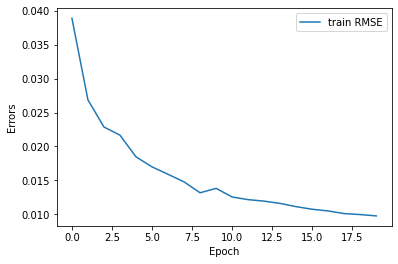

In [182]:
plt.plot(errors, label="train RMSE")
plt.ylabel('Errors')
plt.legend()
plt.xlabel('Epoch')
plt.show()

In [0]:
testUserId =21
testUser = [user_movie[testUserId-1]]

In [0]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, w)+hidden)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w))+visible)
feed = sess.run(hh0, feed_dict={v0 : testUser, w: prev_w, hidden : prev_hb})
rec = sess.run(vv1, feed_dict={hh0 : feed, w: prev_w, visible : prev_vb})

In [0]:
scored_movies=movies_filtered
scored_movies['Recommended Scores']=rec[0]

In [0]:
scored_movies.sort_values(['Recommended Scores'], ascending=False).head(10)

In [0]:
def predict(userId):
  testUser = [user_movie[userId-1]]
  hh0 = tf.nn.sigmoid(tf.matmul(v0, w)+hidden)
  vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(w))+visible)
  feed = sess.run(hh0, feed_dict={v0 : testUser, w: prev_w, hidden : prev_hb})
  rec = sess.run(vv1, feed_dict={hh0 : feed, w: prev_w, visible : prev_vb})
  scored_movies['Recommended Scores']=rec[0]
  #recommendations = scored_movies.sort_values(['Recommended Scores'], ascending=False).head(10)
  #return recommendations
  return scored_movies

In [0]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [0]:
id_map = pd.read_csv('/content/drive/My Drive/SWM/the-movies-dataset/links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(movies_filtered[['title', 'id']], on='id').set_index('title')


In [0]:
indices_map = id_map.set_index('id')

In [0]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(similarity[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = movies_filtered.iloc[movie_indices][['title', 'id']]

    print(len(movies))
    print(movies.head(10))
    recommendations=predict(userId)
    
    #print(recommendations['id'].isin(movies['id']))
    recommendations1 = recommendations[recommendations['id'].isin(movies['id'])]
    print(len(recommendations1))
    #movies['Recommended scores'] = movies['id'].apply(lambda id:  recommendations svd.predict(userId, indices_map.loc[x]['movieId']).est)
    recommendations1 = recommendations1.sort_values('Recommended Scores', ascending=False)
    
    return recommendations1[['title', 'id', 'genres', 'Recommended Scores']].head(10)

In [0]:
 hybrid(7,"Avatar")

In [0]:
rec1

In [0]:
rec2